## Présentation, Projet de Samy AIMEUR et Pierre-Henry Grison

On considère un système de trottinettes électriques en libres services.
Les trottinettes peuvent être empruntées et déposées n’importe où.
Lorsqu’une trottinette a sa batterie vide, un prestataire vient la chercher
pour la recharger. Lorsqu’une trottinette est en panne, un technicien
vient la chercher pour la réparer.

Il y a une flotte de $N$ trottinettes. Le taux d’emprunt moyen est
de $\lambda$ trottinettes par minute. On note $t_{trajet}$ le temps moyen d’un
trajet par un utilisateur. On considère que chaque trottinette a une
probabilité $p_{panne}$ de tomber en panne et une probabilité $p_{vide}$ d’avoir
sa batterie vide lorsqu’elle est utilisée. On suppose qu’une trottinette
non utilisée ne peut pas tomber en panne ou avoir une batterie vide.
On note enfin $t_{intervention}$ le temps moyen d’intervention d’un prestataire
ou d’un technicien, $t_{recharge}$ le temps moyen de recharge de la batterie
d’une trottinette, et $t_{réparation}$ le temps moyen de réparation pour une
trottinette. On considère qu’il y a suffisamment de prestataires et de
techniciens pour chercher, charger et réparer les trottinettes qui en ont 
besoin simultanément. On suppose que les trottinettes sont toujours
réparables.

    Q1)

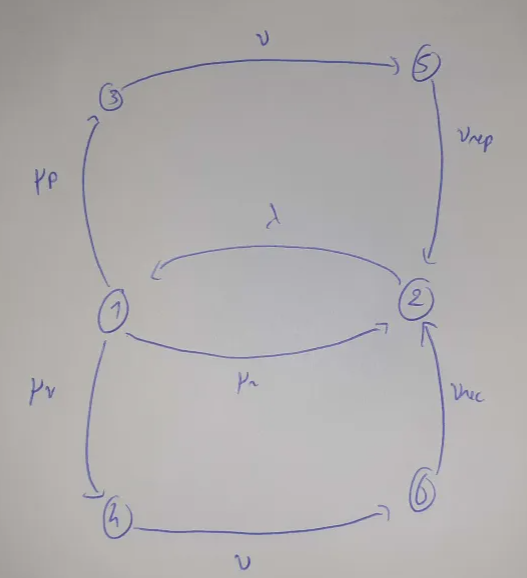

On considère 6 colonies : 

Colonie 1 : Trotinette utilisé

Colonie 2 : Trotinette utilisable

Colonie 3 : Trotinette en panne

Colonie 4 : Trotinette a batterie vide

Colonie 5 : Trotinette en réparation

Colonie 6 : Trotinette entrain d'être rechargé

L'espace d'état est : $$ E = \left\{(n_1, n_2, \ldots, n_6) \in \mathbb{N}^6 | \sum_{i=1}^{6}{n_j} = N \right\}$$

Pour les paramètres on a :

$\mu = \frac{1}{t_{trajet}} \\
\mu_p = \mu p_{panne} \\
\mu_v = \mu p_{vide} \\
\nu = \frac{1}{t_{intervention}} \\
\nu_{rep}= \frac{1}{t_{reparation}} \\
\nu_{rep}= \frac{1}{t_{recharge}} \\
$

On note $T_{i,j}$ la transition d'un individu de la colonie i vers la colonie j.

Par exemple $T_{1,6}$ :
$(n_1, n_2, \ldots, n_6) \rightarrow (n_1 -1, n_2, \ldots, n_6+1)$


Calculons les taux de transitions:

$ q(n,T_{1,2}(n)) = \phi_1(n_1)\mu_r = n_1\mu_r\\
q(n,T_{1,3}(n)) = \phi_1(n_1)\mu_p = n_1\mu_r\\
q(n,T_{1,4}(n)) = \phi_1(n_1)\mu_v = n_1\mu_r\\
q(n,T_{2,1}(n)) = \phi_2(n_2)\lambda = \mathbb{1}_{n_2 >0}\lambda\\
q(n,T_{3,5}(n)) = \phi_3(n_3)\nu = n_3\nu\\ 
q(n,T_{4,6}(n)) = \phi_4(n_4)\nu = n_4\nu\\ 
q(n,T_{5,2}(n)) = \phi_5(n_5)\nu_{rep} = n_5\nu_{rep} \\ 
q(n,T_{6,2}(n)) = \phi_6(n_6)\mu_{rec} = n_6\nu_{rec} \\ $

    Q2)

In [3]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import scipy 

In [4]:
#Paramètres
N = 100
lamba = 0.1
t_trajet = 5
p_panne = 0.01
p_vide = 0.1
t_interv = 30
t_recharge = 240
t_rep = 720

mu = 1/t_trajet
mu_v = mu*p_vide
mu_p = mu*p_panne
mu_r = mu*(1-p_vide-p_panne)
nu = 1/t_interv
nu_rec = 1/t_recharge
nu_rep = 1/t_rep

lambas = np.zeros((6,6))
lambas[0,1] = mu_r
lambas[0,2] = mu_p
lambas[0,3] = mu_v
lambas[1,0] = lamba
lambas[2,4] = nu
lambas[3,5] = nu
lambas[4,1] = nu_rep
lambas[5,1] = nu_rec

    Q3)

La formule de la probabilité stationnaire est :

$$\pi(n) = K^{-1} \prod_{j=1}^{6} \frac{\alpha_{j}^{n_j}}{\prod_{m=1}^{n_j} \phi_{j}(m)} = K^{-1} 
\frac{\alpha_{1}^{n_1}\alpha_{2}^{n_2}\alpha_{3}^{n_3}\alpha_{4}^{n_4}\alpha_5^{n_5}\alpha_{6}^{n_6}}{n_1!n_3!n_4!n_5!n_6!}, \quad n \in E$$
avec 
$$ \forall j \in [1,2,\ldots, 6], \quad \alpha_j > 0, \quad \alpha_j \sum_{k \neq j}^{6}\lambda_{jk} = \sum_{k \neq j}^{6}\alpha_k \lambda_{kj}

$\begin{cases}
\alpha_1(\mu_r + \mu_p + \mu_v) = \alpha_2\lambda\\
\alpha_2 \lambda= \alpha_1\mu_r + \alpha_5 \nu_{rep} + \alpha_6 \nu_{rec} \\
\alpha_3 \nu = \alpha_1 \mu_p \\
\alpha_4 \nu= \alpha_1 \mu_v \\
\alpha_5 \nu_{rep}= \alpha_3\nu \\
\alpha_6 \nu_{rec}= \alpha_4\nu \\
\end{cases} $ 
$\Leftrightarrow$ 
$\begin{cases}
\alpha_1\mu(p_{panne} + p_{vide} + 1-p_{panne}-p_{vide}) = \alpha_1\mu = \alpha_2\lambda\\
\alpha_2 \lambda= \alpha_1\mu_r + \alpha_5 \nu_{rep} + \alpha_6 \nu_{rec} \\
\alpha_3 \nu = \alpha_1 \mu_p \\
\alpha_4 \nu= \alpha_1 \mu_v \\
\alpha_5 \nu_{rep}= \alpha_3\nu \\
\alpha_6 \nu_{rec}= \alpha_4\nu \\
\end{cases} $

Le système n'étant pas full rank, on peut donc choisir les $\alpha_i$ à un facteur près (à condition de prendre le même facteur pour tous les $\alpha_i$ ). Cette constante n'est pas importante car elle sera compenser par le facteur de normalisation $K$ de la probabilité stationnaire. 

On peut donc choisir :
$\begin{cases}
\alpha_1 = \frac{1}{\mu}\\
\alpha_2 = \frac{1}{\lambda}\\
\alpha_3 = \frac{p_{panne}}{\nu}\\
\alpha_4 = \frac{p_{vide}}{\nu}\\
\alpha_5 = \frac{p_{panne}}{\nu_{rep}}\\
\alpha_6 = \frac{p_{vide}}{\nu_{rec}}\\
\end{cases} $ On vérifie bien que ces valeurs vérifie les équations de trafic.

In [5]:
#Calcul de la probabilité théorique stationnaire pour N=2

etats =[(2,0,0,0,0,0),(0,2,0,0,0,0),(0,0,2,0,0,0),(0,0,0,2,0,0),(0,0,0,0,2,0),(0,0,0,0,0,2),(1,1,0,0,0,0),(1,0,1,0,0,0),(1,0,0,1,0,0),(1,0,0,0,1,0),(1,0,0,0,0,1),(0,1,1,0,0,0),(0,1,0,1,0,0),(0,1,0,0,1,0),(0,1,0,0,0,1),(0,0,1,1,0,0),(0,0,1,0,1,0),(0,0,1,0,0,1),(0,0,0,1,1,0),(0,0,0,1,0,1),(0,0,0,0,1,1)]
def alpha(i):
    #On décale tout d'un indice
    if i==0:
        return 1/mu
    if i==1:
        return 1/lamba
    if i==2:
        return p_panne/nu
    if i==3:
        return p_vide/nu
    if i==4:
        return p_panne/nu_rep
    if i==5:
        return p_vide/nu_rec
    
def f(n):
    return np.prod([(alpha(i))**n[i] for i in range(6)])/np.prod([scipy.special.factorial(n[i]) for i in range(6)])

prob_stat = np.zeros(21)
for i in range(21):
    prob_stat[i] = f(etats[i])
prob_stat = prob_stat/np.sum(prob_stat)
print(prob_stat)

[1.02030405e-02 4.08121620e-02 3.67309458e-05 3.67309458e-03
 2.11570248e-02 2.35078053e-01 4.08121620e-02 1.22436486e-03
 1.22436486e-02 2.93847567e-02 9.79491889e-02 2.44872972e-03
 2.44872972e-02 5.87695133e-02 1.95898378e-01 7.34618916e-04
 1.76308540e-03 5.87695133e-03 1.76308540e-02 5.87695133e-02
 1.41046832e-01]


    Q4)

In [6]:
#Cette fonction nous renvoie le vecteur des taux de transitions et un vecteur de le colonie partant vers la colonie rentrante
def taux_transitions(population):
    taux = np.zeros(8)
    trans= [(0,1),(0,2),(0,3),(1,0),(2,4),(3,5),(4,1),(5,1)]
    taux[0] = lambas[0,1]*population[0]
    taux[1] = lambas[0,2]*population[0]
    taux[2] = lambas[0,3]*population[0]
    taux[3] = lambas[1,0]*(population[1]>0)
    taux[4] = lambas[2,4]*population[2]
    taux[5] = lambas[3,5]*population[3]
    taux[6] = lambas[4,1]*population[4]
    taux[7] = lambas[5,1]*population[5]
    return taux, trans

def simul_Markov(T, y0):
    temps = [0]
    population = [y0]
    while temps[-1] < T :
        taux_trans, trans = taux_transitions(population[-1])
        taux_total = np.sum(taux_trans)
        tps = np.random.exponential(1/taux_total)
        temps.append(temps[-1] + tps)
        x = np.random.rand()
        i = 0
        while x > np.sum(taux_trans[:i+1]/taux_total):
            i += 1
        etat_i,etat_j = trans[i]
        new_pop = population[-1].copy()
        new_pop[etat_i] -= 1
        new_pop[etat_j] += 1
        population.append(new_pop)
    return temps, population

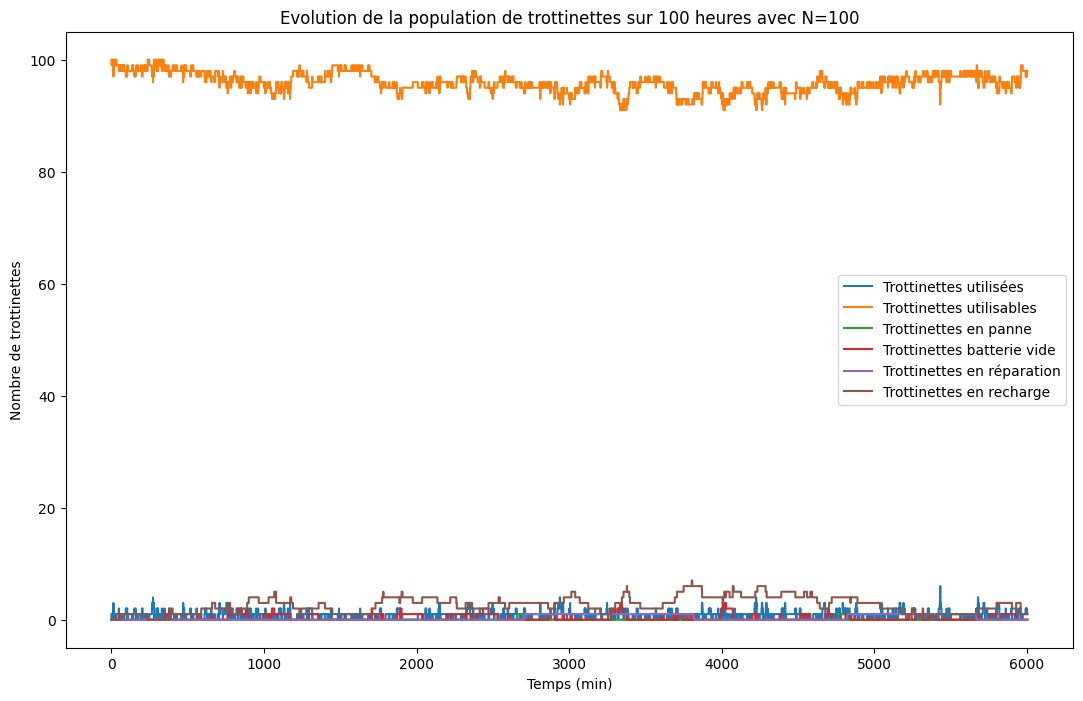

In [7]:
N= 100
y0 = np.array([0,N,0,0,0,0])
T = 60*100 #On simule sur 100 heures
temps, population = simul_Markov(T, y0)
population = np.array(population)
plt.figure(figsize=(13, 8))
plt.step(temps, population[:,0], label = 'Trottinettes utilisées')
plt.step(temps, population[:,1], label = 'Trottinettes utilisables')
plt.step(temps, population[:,2], label = 'Trottinettes en panne')
plt.step(temps, population[:,3], label = 'Trottinettes batterie vide')
plt.step(temps, population[:,4], label = 'Trottinettes en réparation')
plt.step(temps, population[:,5], label = 'Trottinettes en recharge')
plt.legend()
plt.xlabel('Temps (min)')
plt.ylabel('Nombre de trottinettes')
plt.title('Evolution de la population de trottinettes sur ' +str(T//60)+ ' heures avec N='+str(N))
plt.show()

Le graphique peut nous paraitre surprenant mais en regardant les valeurs des paramètres nottament $\lambda = 0.1 min^{-1}$, cela veut dire qu'il faut attendre 10 minutes en moyenne pour que quelqu'un vienne utiliser une trotinnette. Sachant que l'on a 100 trotinettes, le fait que les trotinettes sont en grande majorités prêt à être utilisé est donc cohérente.

    Q5)

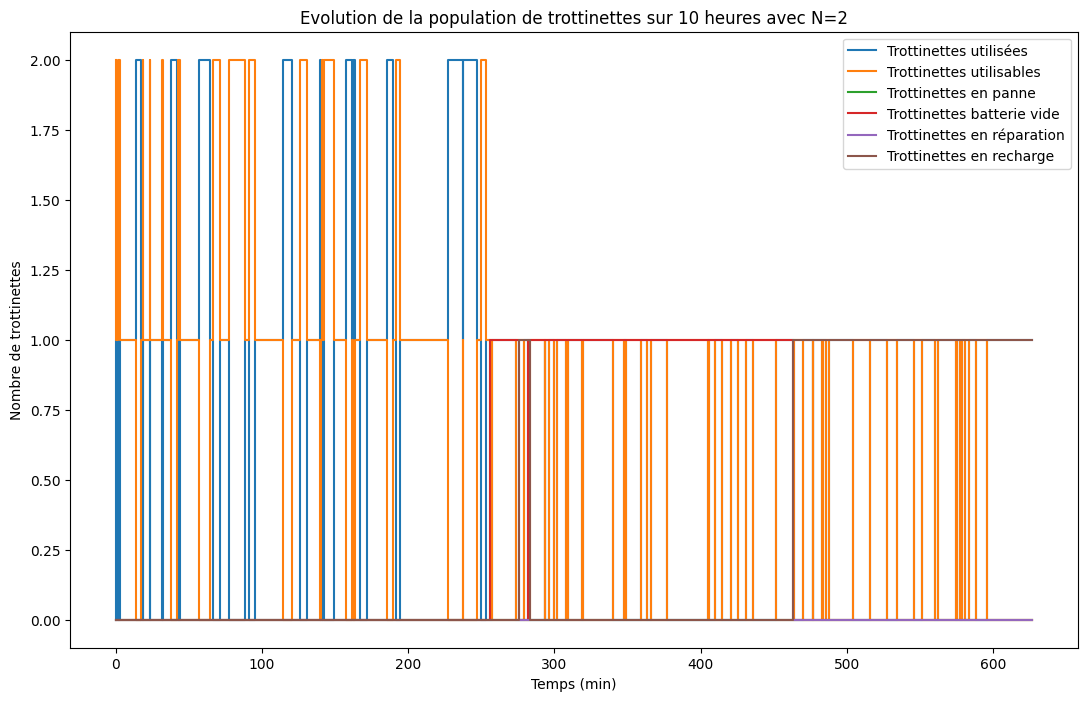

In [9]:
N= 2
y0 = np.array([0,N,0,0,0,0])
T = 60*10 #On simule sur 10 heures
temps, population = simul_Markov(T, y0)
population = np.array(population)
plt.figure(figsize=(13, 8))
plt.step(temps, population[:,0], label = 'Trottinettes utilisées')
plt.step(temps, population[:,1], label = 'Trottinettes utilisables')
plt.step(temps, population[:,2], label = 'Trottinettes en panne')
plt.step(temps, population[:,3], label = 'Trottinettes batterie vide')
plt.step(temps, population[:,4], label = 'Trottinettes en réparation')
plt.step(temps, population[:,5], label = 'Trottinettes en recharge')
plt.legend()
plt.xlabel('Temps (min)')
plt.ylabel('Nombre de trottinettes')
plt.title('Evolution de la population de trottinettes sur ' +str(T//60)+ ' heures avec N='+str(N))
plt.show()

La première méthode est d'utiliser l'érgodicité et la loi forte des grands nombre qui nous donne : $ \lim_{n}\; \frac{1}{n} \; \sum_{k=0}^{n-1} f(X_k)\ =\ \sum_{i\in A}\ \pi(x_i)f(x_i)$

En posant $ f = \mathbb{1}_{x_0}$ on obtient : $ \lim_{n}\; \frac{1}{n} \; \sum_{k=0}^{n-1} \mathbb{1}_{x_0}(X_k)\ = \pi_{x_0}$

Cette méthode a un gros incovéniant, elle nous oblige à attendre la fin du processus. Une autre méthode plus rapide est de lancer en parallèle plusieurs processus de Markov qu'on laisse trouner pendant un temps plus court. On regarde ensuite l'état final du processus et on calcule la probabibilité stationnaire de l'état $n$, $\pi(n)$ en fonction du nombre de processus qui ont $n$ comme état final.

In [293]:
#Méthode 1 
N = 2
T=60*24*500 #500 jours

y0 = np.array([0,1,0,0,1,0])
temps, population = simul_Markov(T, y0)
population = np.array(population)
n = population.shape[0]

dic= {cle: 0 for cle in etats}

for i in range(n):
    dic[tuple(population[i])]+= 1

In [294]:
#A partir de dictionaire on peut calculer la probabilité empirique
prob_emp = np.zeros(21)
for i in range(21):
    prob_emp[i] = dic[etats[i]]/n
print(prob_emp)
print(n)
np.sum(prob_emp)

[4.82914565e-02 9.82432283e-02 6.32501067e-05 2.76719217e-03
 7.11563701e-04 2.04139719e-02 1.46076122e-01 3.55781850e-03
 3.27793678e-02 6.67921127e-02 2.12678484e-01 3.92150662e-03
 3.68589997e-02 6.71241758e-02 2.17501305e-01 5.37625907e-04
 7.43188754e-04 2.15050363e-03 7.02076185e-03 2.30546639e-02
 8.71270220e-03]
63241


1.0

In [295]:
#Methode 2
N = 2
T=60*10 #1 jours
y0 = np.array([1,1,0,0,0,0])
n=10000
res=[]
for i in range(n):
    res.append(tuple(simul_Markov(T, y0)[1][-1]))

proba_emp2 = np.zeros(21)
for i in range(21):
    proba_emp2[i] = res.count(etats[i])/n
print(proba_emp2)

[1.210e-02 3.230e-02 0.000e+00 9.000e-04 9.000e-04 5.320e-02 9.860e-02
 2.400e-03 1.920e-02 5.360e-02 1.817e-01 2.200e-03 1.880e-02 1.340e-01
 3.530e-01 2.000e-04 3.000e-04 1.000e-03 2.700e-03 1.310e-02 1.980e-02]


In [296]:
np.sum(proba_emp2)

1.0

In [ ]:
#Intervales de confiances

CI = []
for i in range(21):
    sigma2 = np.sum()

    Q6)

Si il y'a un nombre fini de prestataires $n_p$ et un nombre fini de techniciens $n_t$, on ne peut plus supposer qu'un technicien ou qu'un prestataire est directement disponible pour s'occuper de la trotinnettes defectueuse.

Ce changement change les taux de transitions en particulier les valeurs de $\phi_i(n)$

Les changements sont :

$\phi_3(n_3) = min(n_3, n_t) \\
\phi_4(n_4) = min(n_4, n_p)$

Ca équivault a avoir une file d'attente avec $n_t$ et $n_p$ serveurs.

    Q7)

Si on considérait qu’une trottinette pouvait devenir irréparable avec une probabilité $p_i$ alors on peut rajouter une septième colonie dans notre système ou une fois dans cette colonie il est impossible d'y ressortir. Cela rend alors notre chaine de Markov non irreductible. On se rapproche ici des modèles de colonies ouvertes.

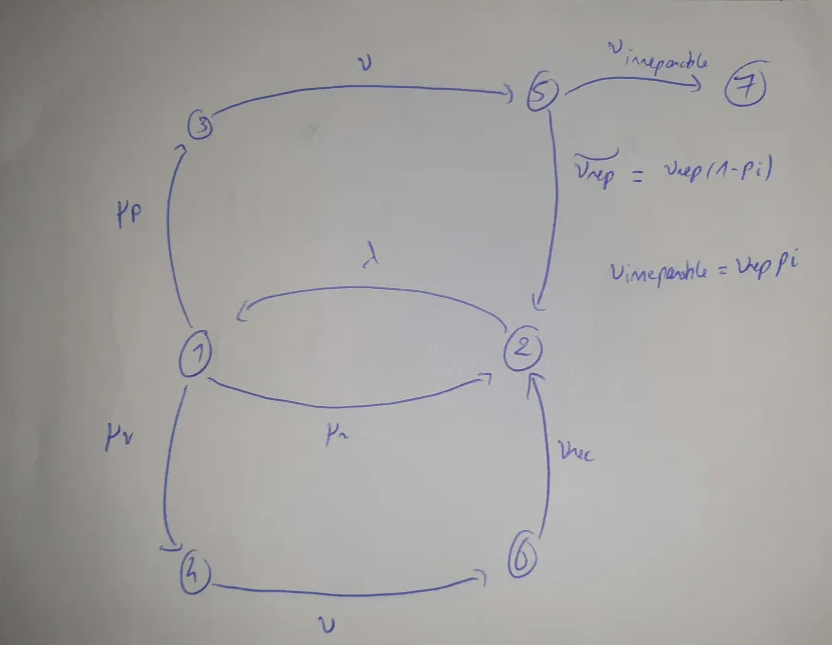

Les changements sont alors :

$q(n,T_{5,2}(n)) = \phi_5(n_5)\widetilde{\nu_{rep}} = n_5\nu_{rep}(1-p_i) \\ 
q(n,T_{5,7}(n)) = \phi_5(n_5)\nu_{irrepable} = n_5\nu_{rep}p_i \\ 
$